<a href="https://colab.research.google.com/github/Bhakti-M/Statistics-Machine-Learning/blob/main/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Problem Statement and Objectives

The dataset that i have uploaded is contains information about students' academic performance,It also contains missing values in some numeric features  which may bias our analysis if not handled properly. Additionally, the dataset includes categorical variables that need to be encoded for machine learning models. The problem is to preprocess the dataset effectively, handle missing values, encode categorical variables, and build predictive models to classify students into "high" or "low" performance categories based on their total scores.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#2.Dataset Exploration and Preprocessing



A.  Explore the Dataset:

In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')

# Display the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75


I.Handle missing values.

In [ ]:
# Check for missing values
print(df.isnull().sum())

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     32
reading score                   0
writing score                   0
dtype: int64


In [ ]:
# Handling Missing Values

# Mean
df['math score'] = df['math score'].fillna(df['math score'].mean())

# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Check data types and anomalies
print(df.dtypes)

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


B. Feature Distribution:

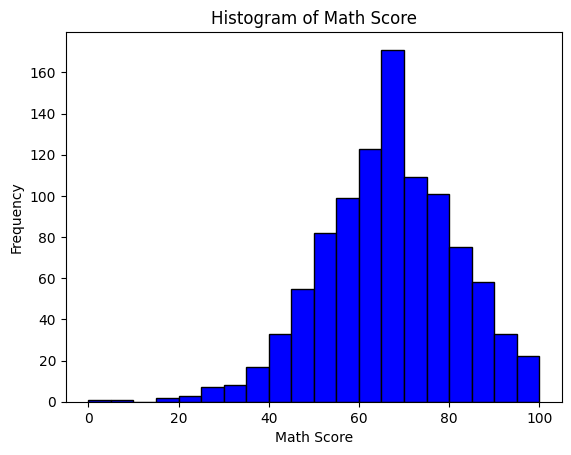

In [ ]:
# Plot a histogram of the math score
plt.hist(df['math score'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


In the histogram shows that the majority of students achieved math scores in the middle range, with fewer students performing exceptionally well or poorly.

In [ ]:
# Check if the distribution follows a normal distribution
from scipy.stats import shapiro
stat, p = shapiro(df['math score'])
print(f'Shapiro-Wilk test p-value: {p}')
if p > 0.05:
    print('Math score distribution is likely normal')
else:
    print('Math score distribution is not normal')


Shapiro-Wilk test p-value: 2.0083482753263096e-05
Math score distribution is not normal


It is important to verify whether the data follows normal distribution before applying such methods.for that I used the Shapiro-Wilk test to determine if the math score distribution is normal or not normal because this fuction use for small dataset to moderate sample sizes.

C. Data Preparation:

In [ ]:
# Normalize numeric features
scaler = StandardScaler()
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])

def frequency_encoding(df, columns): # Changed df_new to df
    for col in columns:
        # Calculate frequency of each category
        frequency_map = df[col].value_counts(normalize=True).to_dict()

        # Map frequencies to the original column
        df[col + '_freq_encoded'] = df[col].map(frequency_map)

    # Drop the original categorical columns
    df = df.drop(columns=columns, axis=1)

    return df

# Example usage:
categorical_cols = ['gender','race/ethnicity','parental level of education']
df_encoded = frequency_encoding(df, categorical_cols) # Changed df_new to df

print(df_encoded.head())

   lunch  test preparation course  math score  reading score  writing score  \
0      1                        1    0.392427       0.193999       0.391492   
1      1                        0    0.190584       1.427476       1.313269   
2      1                        1    1.603488       1.770109       1.642475   
3      0                        1   -1.289602      -0.833899      -1.583744   
4      1                        1    0.661552       0.605158       0.457333   

   total score performance  gender_freq_encoded  race/ethnicity_freq_encoded  \
0     0.977917        high                0.518                        0.190   
1     2.931328        high                0.518                        0.319   
2     5.016071        high                0.518                        0.190   
3    -3.707245         low                0.482                        0.089   
4     1.724042        high                0.482                        0.319   

   parental level of education_freq_encoded 

Here I Normalize the numeric features using standardization  to ensures that this features contribute equally to the model, preventing bias due to scale differences.And Encoded categorical features which converts into a numerical format.

D. Feature Selection:

In [ ]:
X = df.select_dtypes(include=['number']).drop("math score", axis=1)
y = df["math score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()

rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['gender', 'race/ethnicity', 'reading score', 'writing score',
       'total score'],
      dtype='object')


Here I choose this features because they directly measure academic performance (reading score, writing score, and total score) while also providing important demographic context (gender and race/ethnicity). This combination allows the model to capture both the student's academic ability and the potential influence of their background on performance.

**D. II.Classification Model**

Logistic Regression Metrics:
Accuracy: 0.7
Precision: 0.696969696969697
Recall: 0.696969696969697
F1 Score: 0.696969696969697


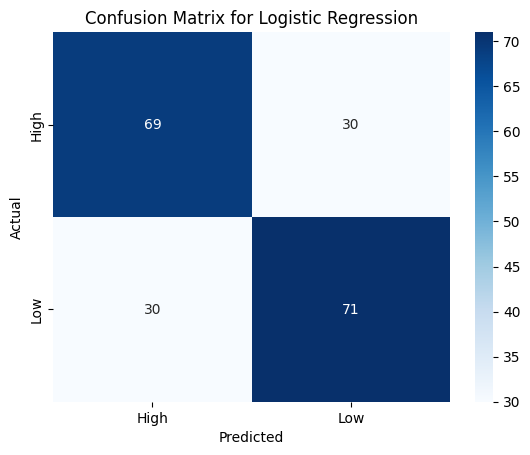

In [ ]:
# Create a binary target based on a threshold of total scores
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
threshold = df['total score'].median()
df['performance'] = df['total score'].apply(lambda x: 'high' if x > threshold else 'low')

# Split the data into training and testing sets
X = df.drop(['math score', 'reading score', 'writing score', 'total score', 'performance'], axis=1)
y = df['performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print('Logistic Regression Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log, pos_label='high'))
print('Recall:', recall_score(y_test, y_pred_log, pos_label='high'))
print('F1 Score:', f1_score(y_test, y_pred_log, pos_label='high'))


# Plot the confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log, labels=['high', 'low'])
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In thi graph we can seen that
True Positives (TP): 70 (The model correctly predicted 70 students as "High" performance).

False Positives (FP): 30 (The model incorrectly predicted 30 students as "High" when they were actually "Low").

True Negatives (TN): 69 (The model correctly predicted 69 students as "Low" performance).

False Negatives (FN): 30 (The model incorrectly predicted 30 students as "Low" when they were actually "High").

The confusion matrix provides a detailed breakdown of the model's performance, highlighting both its strengths and weaknesses. In this case, the Logistic Regression model has a balanced performance with an accuracy of 70%, precision of 70%, and recall of 70%. However, there is room for improvement, particularly in reducing false positives and false negatives, which could be addressed through further model tuning or feature engineering.

Random Forest Metrics:
Accuracy: 0.575
Precision: 0.574468085106383
Recall: 0.5454545454545454
F1 Score: 0.5595854922279793


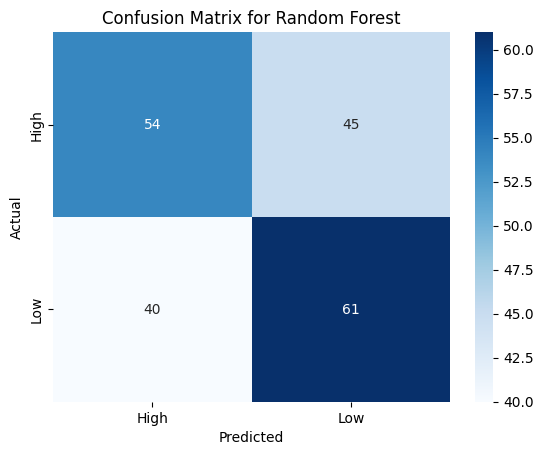

In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print('Random Forest Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, pos_label='high'))
print('Recall:', recall_score(y_test, y_pred_rf, pos_label='high'))
print('F1 Score:', f1_score(y_test, y_pred_rf, pos_label='high'))

# Plot the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['high', 'low'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression and Random Forest models are interpretable and can provide insights into which features are most important for predicting performance that's  why this methos are suitable for this dataset.

4.Creative Task: Neural Networks

Neural Network Metrics:
Accuracy: 0.59
Precision: 0.6024096385542169
Recall: 0.5050505050505051
F1 Score: 0.5494505494505495


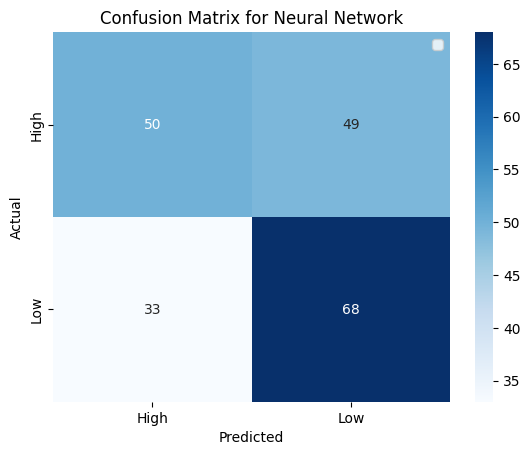

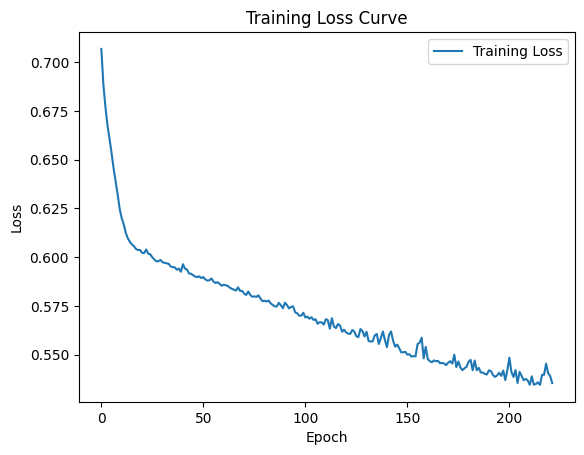

In [ ]:
# Train a Neural Network with three hidden layers
nn = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, activation='relu', solver='adam', random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

# Evaluate the Neural Network model
print('Neural Network Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_nn))
print('Precision:', precision_score(y_test, y_pred_nn, pos_label='high'))
print('Recall:', recall_score(y_test, y_pred_nn, pos_label='high'))
print('F1 Score:', f1_score(y_test, y_pred_nn, pos_label='high'))

# Plot the confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn, labels=['high', 'low'])
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()

# Visualize the loss and accuracy curves for the Neural Network
train_loss = nn.loss_curve_
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Summarize the comparison of the models
print('Model Comparison:')
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Neural Network Accuracy:', accuracy_score(y_test, y_pred_nn))

# Suggestion to improvements for the Neural Network
print('Improvements for Neural Network:')
print('- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV')
print('- Deeper architectures with more hidden layers')
print('- Different activation functions (e.g., tanh, leaky ReLU)')
print('- Regularization techniques like dropout or L2 regularization')

Model Comparison:
Logistic Regression Accuracy: 0.7
Random Forest Accuracy: 0.575
Neural Network Accuracy: 0.59
Improvements for Neural Network:
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
- Deeper architectures with more hidden layers
- Different activation functions (e.g., tanh, leaky ReLU)
- Regularization techniques like dropout or L2 regularization


5.Real-World Applications

In a real-world scenario, this model could be used in educational institutions to predict student performance and provide personalized learning plans. For example, if a student is predicted to have low performance, the school could offer additional tutoring or resources to help them improve.Additionally by continuously updating the model with new data, the predictions can become more accurate over time also the model can be integrated into a learning management system (LMS) to provide real-time feedback to students and teachers.